In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
#loding csv
df=pd.read_csv('C://Users//Bhavesh//bengaluru_home_price_dataset.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#data cleaning
df.isnull().sum()
len(df)

13320

In [4]:
df1=df.drop(['area_type','availability','balcony'],axis='columns')
df1.shape

(13320, 6)

In [5]:
df1.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
price            0
dtype: int64

In [6]:
df1.head()

,location,size,society,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,120.00
2,Uttarahalli,3 BHK,NaN,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,95.00
4,Kothanur,2 BHK,NaN,1200,2.0,51.00


In [7]:
df1.isnull().sum()


location         1
size            16
society       5502
total_sqft       0
bath            73
price            0
dtype: int64

In [8]:
df1=df1.drop(['society'],axis='columns')
df2=df1.dropna()

In [9]:
df2.isnull().sum()
len(df2)

13246

In [10]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
#now cleaning size
df2['size'].unique().sum()

'2 BHK4 Bedroom3 BHK4 BHK6 Bedroom3 Bedroom1 BHK1 RK1 Bedroom8 Bedroom2 Bedroom7 Bedroom5 BHK7 BHK6 BHK5 Bedroom11 BHK9 BHK9 Bedroom27 BHK10 Bedroom11 Bedroom10 BHK19 BHK16 BHK43 Bedroom14 BHK8 BHK12 Bedroom13 BHK18 Bedroom'

In [12]:
#feature engineering
df2['bhk']=df2['size'].apply(lambda x:x.split(' ')[0])
df2.head()

C:\Users\Bhavesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [14]:
#now for total_sqft
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
#tackling ranges
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def ranges(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
   

In [18]:
ranges('2100-2200')

2150.0

In [19]:
df2.shape

(13246, 6)

In [20]:
df4=df2.copy()
df4.head()
df4.shape

(13246, 6)

In [21]:
df4.total_sqft=df4['total_sqft'].apply(ranges)
df4 = df4[df4.total_sqft.notnull()]
df4.shape

(13200, 6)

In [22]:
df4.shape

(13200, 6)

In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [24]:
df4.isnull().sum()
#adding price per sqft

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [25]:
df4.head(10)
len(df4)

13200

In [26]:
df4['price_per_sqft']=(df4.price*100000/df4.total_sqft)

In [27]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
#now examining variable in location
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [29]:
location_stats.values.sum()

13200

In [30]:
#loc_less_then_10=location_stats[location_stats<=10]
#len(loc_less_then_10)
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10.head()

location
Basapura            10
Naganathapura       10
Thyagaraja Nagar    10
Gunjur Palya        10
Sadashiva Nagar     10
Name: location, dtype: int64

In [31]:
#df4['location']=df4.location.apply(lambda x:'other' if x in loc_less_then_10 else x)
df4['location']=df4.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
df4.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
5                      Whitefield
6                Old Airport Road
7                    Rajaji Nagar
8                    Marathahalli
9                           other
10                     Whitefield
11                     Whitefield
12             7th Phase JP Nagar
13                      Gottigere
14                       Sarjapur
15                    Mysore Road
16                  Bisuvanahalli
17          Raja Rajeshwari Nagar
18                          other
19                          other
20                        Kengeri
21                     Binny Pete
22                    Thanisandra
23                      Bellandur
24                          other
25                          other
26                Electronic City
27                     Whitefield
28               Ramagondanahalli
29            

In [32]:
df4.head(20)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
df5=df4.copy()

In [34]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
len(df5.location.unique())

241

In [36]:
#outlier removal buisness method
#df5[df5['total_sqft']/df5['bhk']].head()
df5['bhk'] = df5['bhk'].astype(float)
len(df5[~(df5.total_sqft/df5.bhk<300)])


12456

In [37]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [38]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
upper_limit=df6.price_per_sqft.mean() + 1*df6.price_per_sqft.std()
lower_limit=df6.price_per_sqft.mean() - 1*df6.price_per_sqft.std()
print('upper limit : ',upper_limit)
print('lower limit : ',lower_limit)

upper limit :  10476.630164555358
lower limit :  2140.3754875406403


In [40]:
#x_u=df6[df6.price_per_sqft<=upper_limit]
x_l=df6[df6.price_per_sqft<lower_limit]

In [41]:
#print('total outliers by 1 devition',len(x_u))#+x_l))

In [42]:
df6.shape

(12456, 7)

In [43]:
dfeg1=df6[(df6.price_per_sqft<upper_limit) & (df6.price_per_sqft>lower_limit)]
dfeg1.shape

(11294, 7)

In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape



(10245, 7)

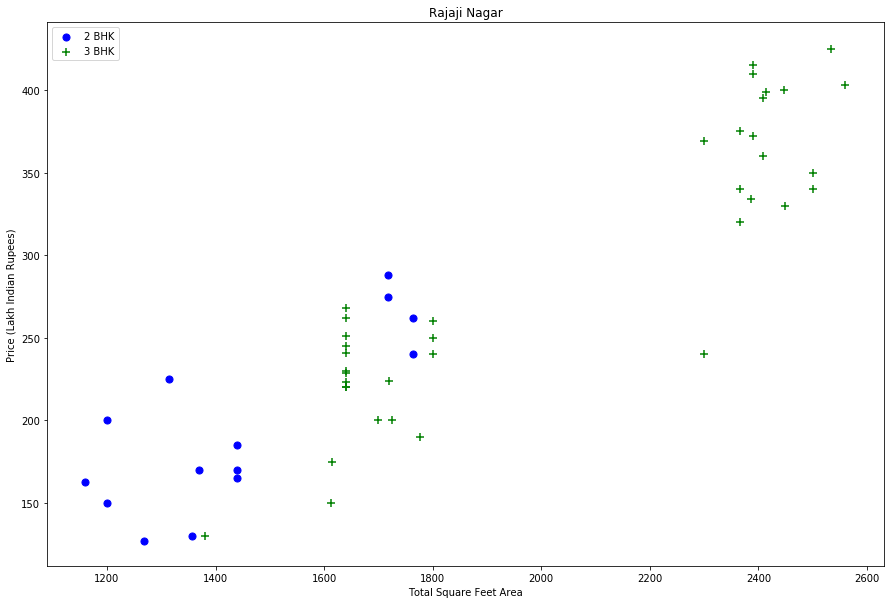

In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7331, 7)

Text(0, 0.5, 'Count')

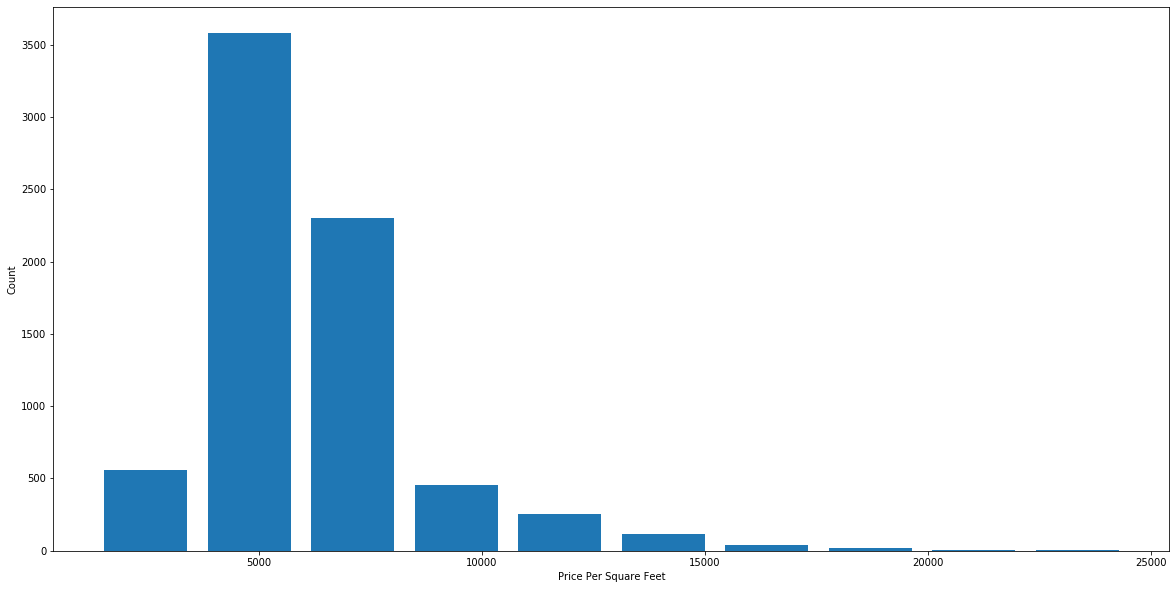

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

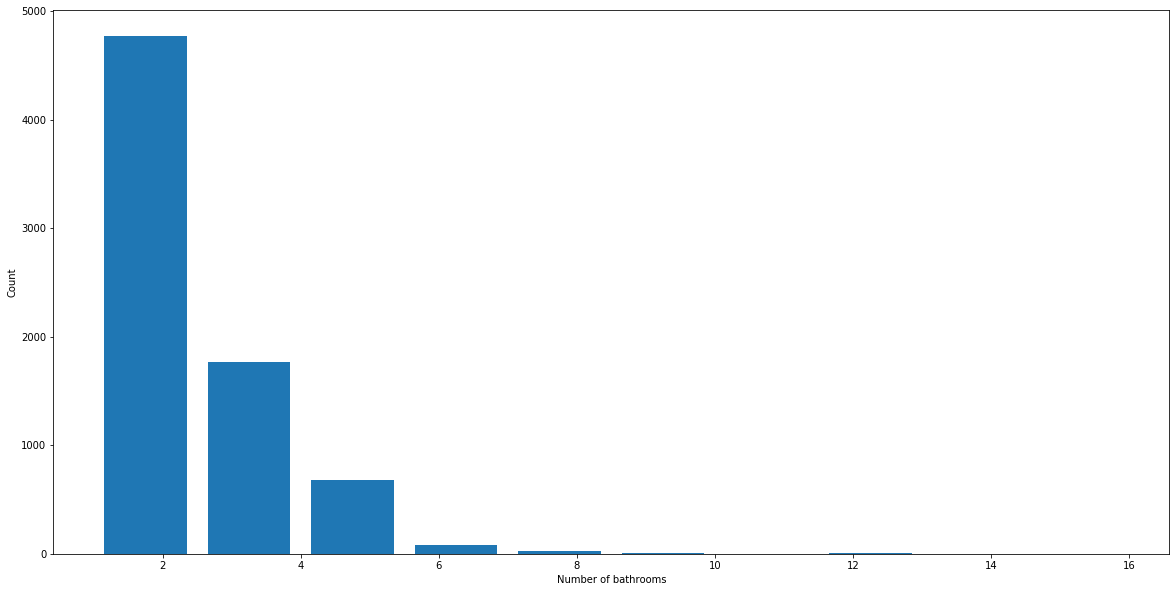

In [48]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:


df8[df8.bath>10]



,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8478,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8567,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9307,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [50]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8402,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [51]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7253, 7)

In [88]:
df9['location']=df9['location'].str.lower()
#df['A'] = df['A'].str.lower()
df9.location.sample(10)

C:\Users\Bhavesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1924    electronic city
7977              other
9049              other
1740        dasarahalli
4491        kodigehalli
9048              other
588         beml layout
7894       yeshwanthpur
3626             jakkur
3016             hennur
Name: location, dtype: object

In [89]:


df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)



,location,total_sqft,bath,price,bhk
1,devarachikkanahalli,1250.0,2.0,40.0,2.0
2,devarachikkanahalli,1200.0,2.0,83.0,2.0
3,devarachikkanahalli,1170.0,2.0,40.0,2.0


In [90]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:


df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()



,location,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df12.shape

(7253, 244)

In [94]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df12.shape

(7253, 244)

In [96]:
df12.head()

,total_sqft,bath,price,bhk,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
y = df12.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [99]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.7780866051090316

In [100]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84014922, 0.78873287, 0.86373278, 0.86871995, 0.88094502])

In [101]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.848456,{'normalize': False}
1,lasso,0.709007,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.756328,"{'criterion': 'mse', 'splitter': 'best'}"


In [102]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [103]:
loc_index = np.where(X.columns=='Chikkabanavar')[0][0]
#(X.columns=='Rajaji Nagar')[0][0]
loc_index

IndexError: index 0 is out of bounds for axis 0 with size 0

In [108]:
predict_price('hebbal',1000, 2, 2)

68.89496576240805

In [109]:
predict_price('chikkabanavar',1000, 2, 2)

19.086799315823097

In [111]:
predict_price('1st phase jp nagar',1000, 3, 2)

90.31734148522058

In [96]:
predict_price('1st Phase JP Nagar',1001, 1, 2)

88.00297704779663

In [97]:
predict_price('1st Phase JP Nagar',100, 1, 2)

13.218561583221835

In [115]:
df12.to_csv('C://Users//Bhavesh//cleaned_bhp.csv')

In [131]:
import pickle
with open('C://Users//Bhavesh//banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [112]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("C://Users//Bhavesh//columns.json","w") as f:
    f.write(json.dumps(columns))

In [113]:
######streamlit
import pandas as pd
import numpy as np
df=pd.read_csv('C://Users//Bhavesh//cleaned_bhp.csv')
X = df.drop(['price'],axis='columns')
y = df.price

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.7780481614961294

In [67]:
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
def predict_price1(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [65]:
predict_price1('hebbal',1112, 2, 2)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [114]:
location='hebbal'
sqft=1589
bath=4
bhk=1
predict_price(location,sqft,bath,bhk)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [51]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

7.467817366833113

In [42]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [69]:
predict_price('Chikkabanavar',1010,2,2)

-63.098662146990875

In [68]:
X.columns[66]

'Chikkabanavar'